In [1]:
# Separately make each plank area (could use cell rotate, but there is no region rotate.)
# Use a loop to make the planks in each area (translate region)
# Building from out -> in 

"""
A1,A2,A3: refer to different areas 
Outer hexagon: HO
Inner hecagon: HI
Diamond Plank Area: D 
Plank Area: P
Fuel Area: F 
Triso Particles: T
Spacers: S 
Control Rod Slot: CS
Control Rod Arm: CA 
"""

'\nA1,A2,A3: refer to different areas \nOuter hexagon: HO\nInner hecagon: HI\nDiamond Plank Area: D \nPlank Area: P\nFuel Area: F \nTriso Particles: T\nSpacers: S \nControl Rod Slot: CS\nControl Rod Arm: CA \n'

In [2]:
%matplotlib inline
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import openmc
import openmc.model
from numpy import sin, cos, tan, pi
import operator
import pandas as pd
import matplotlib.colorbar as cbar
import pylab as pl

In [3]:
openmc.__version__

'0.11.0'

In [4]:
# Materials 
uoc_9 = openmc.Material()
uoc_9.set_density('g/cc', 11)
uoc_9.add_nuclide('U235', 2.27325e-3)
uoc_9.add_nuclide('U238', 2.269476e-2)
uoc_9.add_nuclide('O16', 3.561871e-2)
uoc_9.add_nuclide('C0',9.79714e-3)
uoc_9.temperature = 1110 + 50

"""
uoc_19 = openmc.Material()
uoc_19.set_density('g/cc', 11)
uoc_19.add_nuclide('U235', 4.98781e-3)
uoc_19.add_nuclide('U238', 2.001094e-2)
uoc_19.add_nuclide('O16', 3.566255e-2)
uoc_19.add_nuclide('C12',9.80920e-3)"""

por_c = openmc.Material()
por_c.set_density('g/cc',1)
por_c.add_nuclide('C0',5.013980e-2)
por_c.temperature = 948

si_c = openmc.Material()
si_c.set_density('g/cc', 3.2)
si_c.add_nuclide('Si28', 4.431240e-2)
si_c.add_nuclide('Si29', 2.25887e-3)
si_c.add_nuclide('Si30', 1.48990e-3)
si_c.add_nuclide('C0', 4.806117e-2)
si_c.temperature = 948

graphite = openmc.Material()
graphite.set_density('g/cc', 1.8)
graphite.add_nuclide('C0', 9.025164e-2)
graphite.temperature = 948

p_graphite = openmc.Material()
p_graphite.set_density('g/cc', 1.8)
p_graphite.add_nuclide('C0', 9.025164e-2)
p_graphite.temperature = 948

s_graphite = openmc.Material()
s_graphite.set_density('g/cc', 1.8)
s_graphite.add_nuclide('C0', 9.025164e-2)
s_graphite.temperature = 948

lm_graphite = openmc.Material()
lm_graphite.set_density('g/cc', 1.8)
lm_graphite.add_nuclide('C0', 9.025164e-2)
lm_graphite.temperature = 948

flibe = openmc.Material()
flibe.set_density('g/cc',1.95)
flibe.add_nuclide('Li6',1.383014e-6)
flibe.add_nuclide('Li7',2.37132e-2)
flibe.add_nuclide('Be9',1.18573e-2)
flibe.add_nuclide('F19',4.74291e-2)
flibe.temperature = 948

mhc = openmc.Material()
mhc.set_density('g/cc', 10.28)
mhc.add_nuclide('Mo92', 9.328884e-3)
mhc.add_nuclide('Mo94', 5.850533e-3)
mhc.add_nuclide('Mo95', 1.010836e-2)
mhc.add_nuclide('Mo96', 1.061782e-2)
mhc.add_nuclide('Mo97', 6.102080e-3)
mhc.add_nuclide('Mo98', 1.546981e-2)
mhc.add_nuclide('Mo100', 6.205246e-3)
mhc.add_nuclide('Hf174', 6.659530e-7)
mhc.add_nuclide('Hf176', 2.189321e-5)
mhc.add_nuclide('Hf177', 7.741704e-5)
mhc.add_nuclide('Hf178', 1.135450e-4)
mhc.add_nuclide('Hf179', 5.668925e-5)
mhc.add_nuclide('Hf180', 1.460102e-4)
mhc.add_nuclide('C0', 5.154371e-4)
mhc.temperature = 948

"""
euo_s = openmc.Material()
euo_s.set_density('g/cc',5)
euo_s.add_nuclide('Eu151',8.179510e-3)
euo_s.add_nuclide('Eu153',8.932435e-3)
euo_s.add_nuclide('O16',2.56792e-2)"""

# how to determine wt% of density? 
#euo_p = openmc.Material()
#euo_p.set_density('g/cm3',0.0521)
#euo_p.add_nuclide('Eu151',8.179510e-3)
#euo_p.add_nuclide('Eu153',8.932435e-3)
#euo_p.add_nuclide('O16',2.56792e-2)

mats = openmc.Materials((uoc_9,por_c,si_c,graphite,p_graphite,lm_graphite,flibe,mhc,s_graphite))
mats.export_to_xml()

In [5]:
# constants
H_side = 22.5/np.sin(np.pi/3)

P_len = 23.1 # plank length
P_D_jut = 2-1.4948
P_D_jut_hyp = P_D_jut/sin(pi/3)
P_D_jut_adj = P_D_jut/sin(pi/3)
P_small_gap = 0.35
P_A1_height = 2.55
P_A1_adj = P_A1_height/tan(pi/3)
P_big_gap = 0.7

P_A2_hyp =  P_A1_height/sin(pi/3)
P_big_gap_A2_hyp = P_big_gap/sin(pi/3)
P_A3_hyp = P_A1_height/sin(pi/3)
P_big_gap_A3_hyp = P_big_gap/sin(pi/3)

D_to_center = 2
D_to_center_width = D_to_center*tan(pi/6)
D_A1_width = P_len - 2*(P_D_jut)
D_A1_height = 19.5
D_A1_adj = D_A1_height/np.tan(np.pi/3)

T_pitch = 0.09266

F_protect_gap = 0.1
F_width = T_pitch*(4)
F_len = T_pitch*(210)
F_A1_D_gap = (D_A1_width-F_len)/2
F_F_gap = P_A1_height - 2*F_width -2*F_protect_gap
F_F_gap_adj = F_F_gap/tan(pi/3)
F_A1_width_adj = F_width/tan(pi/3)
F_F_gap_A2_hyp = F_F_gap/sin(pi/3)
F_A2_width_hyp = F_width/sin(pi/3)
F_F_gap_A3_hyp = F_F_gap/sin(pi/3)
F_F_gap_A3_adj = F_F_gap_A3_hyp*cos(pi/3)
F_F_gap_A3_opp = F_F_gap_A3_hyp*sin(pi/3)
F_A3_width_adj = F_width*cos(pi/3)
F_A3_width_opp = F_width*sin(pi/3)

S_S_gap = 14
S_A1_D_gap = (D_A1_width-S_S_gap)/2
S_large_r = 0.7
S_small_r = 0.35

CS_l = 10.38
CS_w = 1.76
CA_l = 10
CA_w = 1 

In [6]:
# top and bottom surfaces (thin dz)
z_thickness = 101 # must be odd
top_surface = openmc.ZPlane(z0=T_pitch/2+(z_thickness-1)/2*T_pitch, boundary_type='reflective')
bot_surface = openmc.ZPlane(z0=-(T_pitch/2+(z_thickness-1)/2*T_pitch), boundary_type='reflective')

In [7]:
## Outermost Hexagon (only hexagon)
H_cell = openmc.Cell(fill=graphite)
H_cell.region = openmc.model.hexagonal_prism(
    edge_length=H_side,
    orientation = 'x',
    boundary_type='reflective') &-top_surface &+ bot_surface

In [8]:
def plane(m,x,y): 
    return openmc.Plane(a=-m,b=1,d=-m*x+y)

def region_maker(area,area_type):
    if area in ['A1','A3']:
        if V[area][area_type]['L']['m'] == 0.0 and V[area][area_type]['R']['m'] == 0.0: 
            region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                     +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                     +openmc.XPlane(x0=V[area][area_type]['L']['x']) &\
                     -openmc.XPlane(x0=V[area][area_type]['R']['x'])     
        else: 
            region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                     +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                     +plane(V[area][area_type]['L']['m'],V[area][area_type]['L']['x'],V[area][area_type]['L']['y']) &\
                     -plane(V[area][area_type]['R']['m'],V[area][area_type]['R']['x'],V[area][area_type]['R']['y']) 
        
    elif area in ['A2']:
        region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                 +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                 -plane(V[area][area_type]['L']['m'],V[area][area_type]['L']['x'],V[area][area_type]['L']['y']) &\
                 +plane(V[area][area_type]['R']['m'],V[area][area_type]['R']['x'],V[area][area_type]['R']['y']) 
    else: 
        raise Exception('Your region type has yet to be defined.')
    return region 

def rx(x_i,y_i,t):
    return x_i*cos(t)-y_i*sin(t)

def ry(x_i,y_i,t):
    return x_i*sin(t)+y_i*cos(t)

In [9]:
# geometry for planes 

m1 = -D_A1_height/D_A1_adj
m2 = D_A1_width*np.sin(np.pi/3)/(D_A1_width*np.cos(np.pi/3))

V = {'A1':{},'A2':{},'A3':{}}

V['A1'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}
V['A2'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}
V['A3'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}

V['A1']['D']['T'] = {'m':0, 'x':0, 'y':-D_to_center}
V['A1']['D']['B'] = {'m':0, 'x':0, 'y':-D_to_center-D_A1_height}
V['A1']['D']['R'] = {'m':m1, 'x':-D_to_center_width, 'y':-D_to_center}
V['A1']['D']['L'] = {'m':m1, 'x':V['A1']['D']['R']['x']-D_A1_width, 'y':-D_to_center}

V['A1']['P']['T'] = {'m':0, 'x':0, 'y':V['A1']['D']['T']['y']-P_small_gap}
V['A1']['P']['B'] = {'m':0, 'x':0, 'y':V['A1']['P']['T']['y']-P_A1_height}
V['A1']['P']['R'] = {'m':m1, 'x':V['A1']['D']['R']['x']+P_small_gap*tan(pi/6)+P_D_jut_hyp, 'y':V['A1']['D']['R']['y']-P_small_gap}
V['A1']['P']['L'] = {'m':m1, 'x':V['A1']['D']['L']['x']+P_small_gap*tan(pi/6)-P_D_jut_hyp, 'y':V['A1']['D']['L']['y']-P_small_gap}

V['A1']['F']['T'] = {'m':0, 'x':V['A1']['D']['R']['x']-F_A1_D_gap, 'y':V['A1']['P']['T']['y']-F_protect_gap}
V['A1']['F']['B'] = {'m':0, 'x':V['A1']['F']['T']['x'], 'y':V['A1']['F']['T']['y']-F_width}
V['A1']['F']['R'] = {'m':0, 'x':V['A1']['D']['R']['x']-F_A1_D_gap, 'y':V['A1']['F']['T']['y']}
V['A1']['F']['L'] = {'m':0, 'x':V['A1']['D']['L']['x']+F_A1_D_gap, 'y':V['A1']['F']['T']['y']}

V['A1']['S']['C'] = {'x0':-D_to_center_width-S_A1_D_gap,'y0':-D_to_center-P_small_gap}
V['A1']['S']['Cb'] = {'x0':-D_to_center_width-S_A1_D_gap+P_A1_adj,'y0':-D_to_center-P_small_gap-P_A1_height}

V['A1']['CS']['T'] = {'m':0, 'x':0, 'y':CS_w/2}
V['A1']['CS']['B'] = {'m':0, 'x':0, 'y':-CS_w/2}
V['A1']['CS']['R'] = {'m':0, 'x':0, 'y':0}
V['A1']['CS']['L'] = {'m':0, 'x':-CS_l, 'y':0}

V['A1']['CA']['T'] = {'m':0, 'x':0, 'y':CA_w/2}
V['A1']['CA']['B'] = {'m':0, 'x':0, 'y':-CA_w/2}
V['A1']['CA']['R'] = {'m':0, 'x':0, 'y':0}
V['A1']['CA']['L'] = {'m':0, 'x':-CA_l, 'y':0}

A2_t = -pi/3*2
V['A2']['D']['T'] = {'m':0, 'x':rx(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A2_t), 'y':ry(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A2_t)}
V['A2']['D']['B'] = {'m':0, 'x':rx(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A2_t), 'y':ry(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A2_t)}
V['A2']['D']['R'] = {'m':m2, 'x':rx(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A2_t), 'y':ry(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A2_t)}
V['A2']['D']['L'] = {'m':m2, 'x':rx(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A2_t), 'y':ry(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A2_t)}

V['A2']['P']['T'] = {'m':0, 'x':rx(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A2_t), 'y':ry(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A2_t)}
V['A2']['P']['B'] = {'m':0, 'x':rx(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A2_t), 'y':ry(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A2_t)}
V['A2']['P']['R'] = {'m':m2, 'x':rx(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A2_t), 'y':ry(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A2_t)}
V['A2']['P']['L'] = {'m':m2, 'x':rx(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A2_t), 'y':ry(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A2_t)}

V['A2']['F']['T'] = {'m':-1/m2, 'x':rx(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A2_t), 'y':ry(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A2_t)}
V['A2']['F']['B'] = {'m':-1/m2, 'x':rx(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A2_t), 'y':ry(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A2_t)}
V['A2']['F']['R'] = {'m':m2, 'x':rx(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A2_t), 'y':ry(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A2_t)}
V['A2']['F']['L'] = {'m':m2, 'x':rx(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A2_t), 'y':ry(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A2_t)}

V['A2']['S']['C'] = {'x0':rx(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A2_t),'y0':ry(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A2_t)}
V['A2']['S']['Cb'] = {'x0':rx(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A2_t),'y0':ry(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A2_t)}

V['A2']['CS']['T'] = {'m':-1/m2, 'x':rx(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A2_t), 'y':ry(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A2_t)}
V['A2']['CS']['B'] = {'m':-1/m2, 'x':rx(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A2_t), 'y':ry(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A2_t)}
V['A2']['CS']['R'] = {'m':m2, 'x':rx(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A2_t), 'y':ry(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A2_t)}
V['A2']['CS']['L'] = {'m':m2, 'x':rx(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A2_t), 'y':ry(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A2_t)}

V['A2']['CA']['T'] = {'m':-1/m2, 'x':rx(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A2_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A2_t)}
V['A2']['CA']['B'] = {'m':-1/m2, 'x':rx(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A2_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A2_t)}
V['A2']['CA']['R'] = {'m':m2, 'x':rx(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A2_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A2_t)}
V['A2']['CA']['L'] = {'m':m2, 'x':rx(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A2_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A2_t)}

A3_t = pi/3*2
V['A3']['D']['T'] = {'m':m2, 'x':rx(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A3_t), 'y':ry(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A3_t)}
V['A3']['D']['B'] = {'m':m2, 'x':rx(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A3_t), 'y':ry(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A3_t)}
V['A3']['D']['R'] = {'m':m1, 'x':rx(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A3_t), 'y':ry(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A3_t)}
V['A3']['D']['L'] = {'m':m1, 'x':rx(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A3_t), 'y':ry(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A3_t)}

V['A3']['P']['T'] = {'m':m2, 'x':rx(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A3_t), 'y':ry(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A3_t)}
V['A3']['P']['B'] = {'m':m2, 'x':rx(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A3_t), 'y':ry(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A3_t)}
V['A3']['P']['R'] = {'m':m1, 'x':rx(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A3_t), 'y':ry(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A3_t)}
V['A3']['P']['L'] = {'m':m1, 'x':rx(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A3_t), 'y':ry(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A3_t)}

V['A3']['F']['T'] = {'m':-1/m1, 'x':rx(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A3_t), 'y':ry(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A3_t)}
V['A3']['F']['B'] = {'m':-1/m1, 'x':rx(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A3_t), 'y':ry(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A3_t)}
V['A3']['F']['R'] = {'m':m1, 'x':rx(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A3_t), 'y':ry(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A3_t)}
V['A3']['F']['L'] = {'m':m1, 'x':rx(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A3_t), 'y':ry(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A3_t)}

V['A3']['S']['C'] = {'x0':rx(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A3_t),'y0':ry(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A3_t)}
V['A3']['S']['Cb'] = {'x0':rx(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A3_t),'y0':ry(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A3_t)}

V['A3']['CS']['T'] = {'m':-1/m1, 'x':rx(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A3_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t)}
V['A3']['CS']['B'] = {'m':-1/m1, 'x':rx(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A3_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t)}
V['A3']['CS']['R'] = {'m':m1, 'x':rx(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A3_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t)}
V['A3']['CS']['L'] = {'m':m1, 'x':rx(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A3_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t)}

V['A3']['CA']['T'] = {'m':-1/m1, 'x':rx(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t)}
V['A3']['CA']['B'] = {'m':-1/m1, 'x':rx(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t)}
V['A3']['CA']['R'] = {'m':m1, 'x':rx(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t)}
V['A3']['CA']['L'] = {'m':m1, 'x':rx(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t)}


In [10]:
# Diamond Plank Area
A1_D_cell = openmc.Cell(fill=flibe)
A1_D_cell.region = region_maker('A1','D') &-top_surface &+ bot_surface

A2_D_cell = openmc.Cell(fill=flibe)
A2_D_cell.region = region_maker('A2','D') &-top_surface &+ bot_surface

A3_D_cell = openmc.Cell(fill=flibe)
A3_D_cell.region = region_maker('A3','D') &-top_surface &+ bot_surface

D_regions = A1_D_cell.region | A2_D_cell.region | A3_D_cell.region 
D_universe = openmc.Universe(cells=(A1_D_cell,A2_D_cell,A3_D_cell,))
D_areas = openmc.Cell(fill=D_universe,region=D_regions)
H_cell.region &= ~D_regions

In [11]:
# Graphite Planks 
all_P_univ = openmc.Universe()
all_P_regions = region_maker('A1','P') # initialize
T = {'A1':{'P':{},'F':{},'S':{}},'A2':{'P':{},'F':{},'S':{}},'A3':{'P':{},'F':{},'S':{}}}
T['A1']['P'] = {'x':(P_big_gap+P_A1_height)/tan(pi/3),'y':-(P_big_gap+P_A1_height)}
T['A2']['P'] = {'x':-P_A2_hyp-P_big_gap_A2_hyp, 'y':0}
T['A3']['P'] = {'x':(P_A3_hyp+P_big_gap_A3_hyp)*cos(pi/3), 'y':(P_A3_hyp+P_big_gap_A3_hyp)*sin(pi/3)}

for area in range(3):
    area_str = 'A{}'.format(area+1)
    P_region = region_maker(area_str,'P')
    P_cell = openmc.Cell(fill=p_graphite,region=P_region)
    P_univ = openmc.Universe(cells=(P_cell,))
    for trans in range(6):
        P_region_new = P_region.translate((trans*T[area_str]['P']['x'],trans*T[area_str]['P']['y'],0))
        P_cell_new = openmc.Cell(fill=P_univ,region=P_region_new)
        P_cell_new.translation = (trans*T[area_str]['P']['x'],trans*T[area_str]['P']['y'],0)
        all_P_univ.add_cell(P_cell_new)
        all_P_regions |= P_region_new
        D_areas.region &= ~P_region_new
        H_cell.region &= ~P_region_new
P_areas = openmc.Cell(fill=all_P_univ,region=all_P_regions&-top_surface &+ bot_surface)

In [12]:
# Triso Particles 
spheres = [openmc.Sphere(r=1e-5*r)
           for r in [2135., 3135., 3485., 3835., 4235,]]
triso_cells = [openmc.Cell(fill=uoc_9, region=-spheres[0]),
         openmc.Cell(fill=por_c, region=+spheres[0] & -spheres[1]),
         openmc.Cell(fill=graphite, region=+spheres[1] & -spheres[2]),
         openmc.Cell(fill=si_c, region=+spheres[2] & -spheres[3]),
         openmc.Cell(fill=graphite, region=+spheres[3] &-spheres[4]),
         openmc.Cell(fill=lm_graphite, region=+spheres[4])]
triso_univ = openmc.Universe(cells=triso_cells)
lm_graphite_cell = openmc.Cell(fill=lm_graphite)
lm_graphite_univ = openmc.Universe(cells=(lm_graphite_cell,))

u = triso_univ
lattice = openmc.RectLattice()
lattice.lower_left = (V['A1']['F']['L']['x'], V['A1']['F']['B']['y'],-(T_pitch/2+(z_thickness-1)/2*T_pitch))
lattice.pitch = (T_pitch, T_pitch,T_pitch)
lattice.outer = lm_graphite_univ
lattice_list = []
for z in range(z_thickness): 
    lattice_z_list = []
    for row in range(4):
        lattice_y_list = []
        for col in range(210):
            lattice_y_list.append(u)
        lattice_z_list.append(lattice_y_list)
    lattice_list.append(lattice_z_list)
        
lattice.universes = lattice_list

In [13]:
# Fuel Plank 
all_F_univ = openmc.Universe()
all_F_regions = region_maker('A1','F') # initialize
T['A1']['F'] = {'x':F_F_gap_adj+F_A1_width_adj, 'y':-F_F_gap-F_width}
T['A2']['F'] = {'x':-F_F_gap_A2_hyp-F_A2_width_hyp, 'y':0}
T['A3']['F'] = {'x':F_F_gap_A3_adj+F_A3_width_adj, 'y':F_F_gap_A3_opp+F_A3_width_opp}

for area in range(3): 
    area_str = 'A{}'.format(area+1)
    F_region = region_maker(area_str,'F')
    F_cell = openmc.Cell(fill=lm_graphite,)
    F_cell.fill = lattice
    F_univ = openmc.Universe(cells=(F_cell,))
    for t in range(6):
        for x in range(2):
            x_trans = t*T[area_str]['P']['x']
            y_trans = t*T[area_str]['P']['y']
            if x == 1:
                x_trans += T[area_str]['F']['x']
                y_trans += T[area_str]['F']['y']
            F_region_new = F_region.translate((x_trans,y_trans,0))
            F_cell_new = openmc.Cell(fill=F_univ,region=F_region_new)
            if area == 1: 
                F_cell_new.rotation = (0,0,-120)
            if area == 2: 
                F_cell_new.rotation = (0,0,120)
            F_cell_new.translation = (x_trans,y_trans,0)
            all_F_univ.add_cell(F_cell_new)
            all_F_regions |= F_region_new
            P_areas.region &= ~F_region_new 
            D_areas.region &= ~F_region_new
            H_cell.region &= ~F_region_new 
F_areas = openmc.Cell(fill=all_F_univ,region=all_F_regions&-top_surface &+ bot_surface)

In [14]:
# Spacer 
all_S_univ = openmc.Universe()
S_small_spacer_surf = openmc.ZCylinder(r=S_small_r,x0=-D_to_center_width-S_A1_D_gap,y0=-D_to_center-P_small_gap) # initialize 
all_S_regions = -S_small_spacer_surf & +plane(V['A1']['P']['T']['m'],V['A1']['P']['T']['x'],V['A1']['P']['T']['y'])
T['A1']['S'] = {'x':-S_S_gap, 'y':0}
T['A2']['S'] = {'x':S_S_gap*cos(pi/3), 'y':S_S_gap*sin(pi/3)}
T['A3']['S'] = {'x':S_S_gap*cos(pi/3), 'y':-S_S_gap*sin(pi/3)}

# outer loop is for 3 types of spacers, small top, big middle, small bottom 
rad = [S_small_r, S_large_r,S_small_r] 
start = [0,1,5]
end = [1,6,6]
C = ['C','C','Cb']
for y in range(3):      
    for area in range(3):
        area_str = 'A{}'.format(area+1)
        S_cylinder = openmc.ZCylinder(r=rad[y],x0=V[area_str]['S'][C[y]]['x0'],y0=V[area_str]['S'][C[y]]['y0']) 
        if area == 0:
            S_region = -S_cylinder & +plane(V[area_str]['P']['T']['m'],V[area_str]['P']['T']['x'],V[area_str]['P']['T']['y'])
            if y == 2: 
                S_region = -S_cylinder & -plane(V[area_str]['P']['B']['m'],V[area_str]['P']['B']['x'],V[area_str]['P']['B']['y'])
        if area == 1:
            S_region = -S_cylinder & -plane(V[area_str]['P']['R']['m'],V[area_str]['P']['R']['x'],V[area_str]['P']['R']['y'])   
            if y == 2: 
                S_region = -S_cylinder & +plane(V[area_str]['P']['L']['m'],V[area_str]['P']['L']['x'],V[area_str]['P']['L']['y'])
        if area == 2:
            S_region = -S_cylinder & -plane(V[area_str]['P']['L']['m'],V[area_str]['P']['L']['x'],V[area_str]['P']['L']['y'])     
            if y == 2: 
                S_region = -S_cylinder & +plane(V[area_str]['P']['R']['m'],V[area_str]['P']['R']['x'],V[area_str]['P']['R']['y'])
        S_cell = openmc.Cell(fill=s_graphite,region=S_region)
        S_univ = openmc.Universe(cells=(S_cell,))
        for trans in range(start[y],end[y]):
            for x in range(2):
                x_trans = trans*T[area_str]['P']['x']
                y_trans = trans*T[area_str]['P']['y']
                if x == 1:
                    x_trans += T[area_str]['S']['x']
                    y_trans += T[area_str]['S']['y']
                S_region_new = S_region.translate((x_trans,y_trans,0))
                S_cell_new = openmc.Cell(fill=S_univ,region=S_region_new)
                S_cell_new.translation = (x_trans,y_trans,0)
                all_S_univ.add_cell(S_cell_new)
                all_S_regions |= S_region_new
                F_areas.region &= ~S_region_new
                P_areas.region &= ~S_region_new
                D_areas.region &= ~S_region_new
                H_cell.region &= ~S_region_new
S_areas = openmc.Cell(fill=all_S_univ,region=all_S_regions&-top_surface &+ bot_surface)

In [15]:
# Control Rod Slot 

A1_CS_cell = openmc.Cell(fill=flibe)
A1_CS_cell.region = region_maker('A1','CS') &-top_surface &+ bot_surface

A2_CS_cell = openmc.Cell(fill=flibe)
A2_CS_cell.region = region_maker('A2','CS') &-top_surface &+ bot_surface

A3_CS_cell = openmc.Cell(fill=flibe)
A3_CS_cell.region = region_maker('A3','CS') &-top_surface &+ bot_surface

CS_regions = A1_CS_cell.region | A2_CS_cell.region | A3_CS_cell.region 
CS_universe = openmc.Universe(cells=(A1_CS_cell,A2_CS_cell,A3_CS_cell,))
CS_areas = openmc.Cell(fill=CS_universe,region=CS_regions)
S_areas.region &= ~CS_regions 
F_areas.region &= ~CS_regions 
P_areas.region &= ~CS_regions 
D_areas.region &= ~CS_regions 
H_cell.region &= ~CS_regions 

In [16]:
# Control Rod Arm
A1_CA_cell = openmc.Cell(fill=flibe)
A1_CA_cell.region = region_maker('A1','CA') &-top_surface &+ bot_surface

A2_CA_cell = openmc.Cell(fill=flibe)
A2_CA_cell.region = region_maker('A2','CA') &-top_surface &+ bot_surface

A3_CA_cell = openmc.Cell(fill=flibe)
A3_CA_cell.region = region_maker('A3','CA') &-top_surface &+ bot_surface

CA_regions = A1_CA_cell.region | A2_CA_cell.region | A3_CA_cell.region 
CA_universe = openmc.Universe(cells=(A1_CA_cell,A2_CA_cell,A3_CA_cell,))
CA_areas = openmc.Cell(fill=CA_universe,region=CA_regions)
CS_areas.region &= ~CA_regions
S_areas.region &= ~CA_regions 
F_areas.region &= ~CA_regions 
P_areas.region &= ~CA_regions 
D_areas.region &= ~CA_regions 
H_cell.region &= ~CA_regions 

In [17]:
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
geom = openmc.Geometry(root)
geom.export_to_xml()
point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
#settings.source = src
settings.batches = 10
settings.inactive = 1
settings.particles = 100
settings.temperature = {'multipole':True,'method':'interpolation'}
settings.output = {'tallies': True}
settings.export_to_xml()

In [18]:
tallies_file = openmc.Tallies()
mesh_no = 0
for t in range(6):
    mesh_no += 1
    for x in range(2):
        x_trans = t*T['A1']['P']['x']
        y_trans = t*T['A1']['P']['y']
        if x == 1:
            mesh_no += 1
            x_trans += T['A1']['F']['x']
            y_trans += T['A1']['F']['y']
        mesh = openmc.RegularMesh(mesh_id=mesh_no)
        mesh.dimension = [1,5]
        mesh.lower_left = [V['A1']['F']['L']['x']+x_trans, 
                           V['A1']['F']['B']['y']+y_trans]
        mesh.upper_right = [V['A1']['F']['R']['x']+x_trans, 
                            V['A1']['F']['T']['y']+y_trans]
        mesh_filter = openmc.MeshFilter(mesh)
        tally = openmc.Tally(name='mesh tally '+str(mesh_no))
        tally.filters = [mesh_filter]
        tally.scores = ['fission']
        tallies_file.append(tally)
tallies_file.export_to_xml()

In [20]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [21]:
sp = openmc.StatePoint('statepoint.10.h5')
region = ['1','2','3','4','5']
fission_rates = []
num = 1
for x in range(1,13): 
    mesh_tally = sp.get_tally(name='mesh tally '+str(x))
    a = mesh_tally.get_pandas_dataframe()
    a = a.drop(columns=['mesh '+str(x),'nuclide','score'])
    if (x%2) == 0:
        num = int(x/2)
        stripe = [str(num)+'B']*5
    else:
        num = int((x+1)/2)
        stripe = [str(num)+'T']*5
    a['Region'] = region
    a['Stripe'] = stripe
    if x == 1: 
        df = a
    else:
        df = df.append(a)
    b = a['mean'].to_numpy()
    fission_rates.append(b)
df = df.set_index(['Stripe','Region'])

/Users/gwenchee/anaconda3/envs/openmc-env/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [22]:
ave = df['mean'].mean()
df['Fission Density'] = df['mean']/ave
ave_sd = np.sqrt(((df['mean'] - ave)**2).mean())
df['FD std dev'] = np.sqrt((df['std. dev.']/df['mean'])**2 + (ave_sd/ave)**2)

In [23]:
df

mean std. dev. Fission Density FD std dev
                                                            
Stripe Region                                               
1T     1       0.004892  0.000584        1.518809   0.343284
       2       0.003455  0.000291        1.072658   0.332692
       3       0.001677  0.000144        0.520663   0.333173
       4       0.003420  0.000223        1.061909   0.328400
       5       0.004633  0.000384        1.438604   0.332339
1B     1       0.004681  0.000449        1.453339   0.335840
       2       0.003311  0.000481        1.028174   0.353106
       3       0.001667  0.000213        0.517692   0.346361
       4       0.003116  0.000442        0.967326   0.351677
       5       0.004550  0.000639        1.412632   0.351135
2T     1       0.003197  0.000403        0.992609   0.345620
       2       0.003330  0.000388        1.033810   0.342257
       3       0.001511  0.000228        0.469210   0.355326
       4       0.002830  0.000303        0.878592   0.339173
       5       0.004123  0.000516        1.280013   0.345323
2B     1       0.004047  0.000471        1.256476   0.342261
       2       0.002894  0.000401        0.898492   0.350378
       3       0.001770  0.000387        0.549436   0.389168
       4       0.002597  0.000391        0.806339   0.355386
       5       0.003848  0.000434        1.194773   0.341069
3T     1       0.004026  0.000646        1.250104   0.359628
       2       0.003355  0.000390        1.041592   0.342178
       3       0.001687  0.000175        0.523940   0.338164
       4       0.003034  0.000400        0.941935   0.347873
       5       0.003647  0.000453        1.132378   0.345022
3B     1       0.004235  0.000704        1.315031   0.362221
       2       0.003136  0.000348        0.973596   0.340425
       3       0.001479  0.000197        0.459348   0.348210
       4       0.003136  0.000527        0.973743   0.363087
       5       0.003995  0.000303        1.240390   0.330703
4T     1       0.004341  0.000536        1.347762   0.344755
       2       0.003402  0.000461        1.056314   0.349221
       3       0.001690  0.000256        0.524632   0.355830
       4       0.003282  0.000665        1.018935   0.380255
       5       0.003978  0.000436        1.235104   0.340030
4B     1       0.004205  0.000520        1.305626   0.344763
       2       0.002852  0.000244        0.885528   0.333031
       3       0.001232  0.000134        0.382587   0.339665
       4       0.002193  0.000332        0.680865   0.355779
       5       0.003407  0.000324        1.057955   0.335583
5T     1       0.003755  0.000383        1.165833   0.337650
       2       0.003080  0.000392        0.956189   0.346167
       3       0.001442  0.000169        0.447763   0.342552
       4       0.003276  0.000447        1.017271   0.349597
       5       0.003601  0.000435        1.118008   0.343782
5B     1       0.004814  0.000586        1.494579   0.344120
       2       0.004076  0.000648        1.265510   0.359016
       3       0.001301  0.000141        0.404082   0.339723
       4       0.003013  0.000355        0.935424   0.342788
       5       0.004138  0.000485        1.284704   0.342523
6T     1       0.003696  0.000605        1.147702   0.361044
       2       0.002738  0.000320        0.850092   0.342440
       3       0.001249  0.000147        0.387939   0.342755
       4       0.002899  0.000390        0.900222   0.348802
       5       0.003986  0.000533        1.237619   0.348505
6B     1       0.004323  0.000496        1.342222   0.341720
       2       0.003458  0.000513        1.073608   0.354444
       3       0.001641  0.000203        0.509490   0.344869
       4       0.003511  0.000394        1.090145   0.340873
       5       0.005387  0.000669        1.672675   0.344958

In [24]:
df.to_csv('p1a_c1a_c.csv')

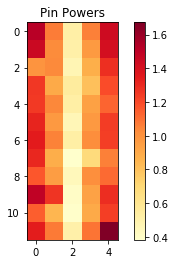

In [25]:
fission_rates /= np.mean(fission_rates)

plt.figure()
plt.imshow(fission_rates, interpolation='none', cmap='YlOrRd', origin='upper')
plt.colorbar()
plt.title('Pin Powers')
plt.show()

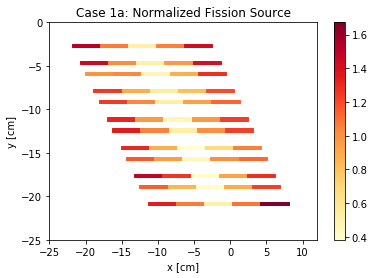

In [26]:
xs = []
ys = []
ws = np.array([F_len/5]*60)
hs = np.array([F_width]*60)
vs = fission_rates.flatten()

for p in range(6): 
    for f in range(2): 
        x_trans = p*T['A1']['P']['x']
        y_trans = p*T['A1']['P']['y']
        if f == 1:
            x_trans += T['A1']['F']['x']
            y_trans += T['A1']['F']['y']
        for s in range(5):
            if s > 0:
                x_trans += F_len/5
            xs.append(V['A1']['F']['L']['x']+x_trans)
            ys.append(V['A1']['F']['B']['y']+y_trans)

normal = pl.Normalize(vs.min(), vs.max())
colors = pl.cm.YlOrRd(normal(vs))

ax = pl.subplot(111)
for x,y,w,h,c in zip(xs,ys,ws,hs,colors):
    rect = pl.Rectangle((x,y),w,h,color=c)
    ax.add_patch(rect)

cax, _ = cbar.make_axes(ax) 
cb2 = cbar.ColorbarBase(cax, cmap=pl.cm.YlOrRd,norm=normal) 

ax.set_xlim(-25,12)
ax.set_ylim(-25,0)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title('Case 1a: Normalized Fission Source')
pl.savefig('norm-fission-source.png',bbox_inches='tight')
pl.show()